<h2>Different Approaches for Converting Words Into Vectors In NLP</h2>

In [159]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
import re
import spacy

In [205]:
Pipeline=spacy.load("en_core_web_sm")
cv=CountVectorizer()
OhE=OneHotEncoder(handle_unknown="ignore")
LE=LabelEncoder()

In [190]:
df=pd.read_csv("email.csv",on_bad_lines='skip')

In [191]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [192]:
df.Category.value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [193]:
df['spam']=df.Category.apply(lambda x : 1 if x == 'spam' else 0)

In [194]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [195]:
df.isnull().sum()

Category    0
Message     0
spam        0
dtype: int64

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sb
model=LogisticRegression()

In [197]:
import seaborn as sn
def Evaluator(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    pred=precision_score(Y_test,Y_pred)
    rec=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)

    print(
          f"Accuracy : {accuracy}\nPrecision : {pred}\nRecall : {rec}\nF1-Score : {f1}" )
    print(classification_report(Y_test,Y_pred))
    cm=confusion_matrix(Y_test,Y_pred)
    plt.figure(figsize=(10,7))
    sn.heatmap(cm,annot=True)
    plt.show()

In [198]:
X_train,X_test,Y_train,Y_test=train_test_split(df.Message,df.spam,test_size=0.2,random_state=42)

In [170]:
X_train_cv=cv.fit_transform(X_train.values)

In [171]:
X_train_cv=X_train_cv.toarray()

In [172]:
X_train_cv.shape

(4458, 7754)

In [173]:
ft=cv.get_feature_names_out()[1000:1120]

In [174]:
cv.vocabulary_

{'free2day': 2983,
 'sexy': 6066,
 'st': 6442,
 'george': 3119,
 'day': 2191,
 'pic': 5222,
 'of': 4908,
 'jordan': 3859,
 'txt': 7106,
 'to': 6946,
 '89080': 725,
 'dont': 2419,
 'miss': 4529,
 'out': 5023,
 'then': 6843,
 'every': 2662,
 'wk': 7569,
 'saucy': 5937,
 'celeb': 1722,
 'more': 4603,
 'pics': 5227,
 'pocketbabe': 5302,
 'co': 1897,
 'uk': 7133,
 '0870241182716': 86,
 'still': 6495,
 'havent': 3376,
 'got': 3215,
 'urself': 7225,
 'jacket': 3791,
 'ah': 891,
 'lol': 4202,
 'now': 4860,
 'after': 872,
 'that': 6828,
 'hot': 3512,
 'air': 902,
 'balloon': 1231,
 'thnk': 6875,
 'its': 3777,
 'wrong': 7638,
 'calling': 1639,
 'between': 1353,
 'us': 7226,
 'bot': 1463,
 'notes': 4849,
 'oredi': 4998,
 'cos': 2038,
 'juz': 3890,
 'rem': 5698,
 'ur': 7212,
 'going': 3184,
 'bahamas': 1223,
 'callfreefone': 1637,
 '08081560665': 65,
 'and': 983,
 'speak': 6377,
 'live': 4168,
 'operator': 4973,
 'claim': 1848,
 'either': 2558,
 'cruise': 2106,
 '2000': 359,
 'cash': 1696,
 '18': 

In [175]:
X_train_cv[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(7754,))

In [176]:
np.where(X_train_cv[0]!=0)

(array([  86,  725, 1722, 1897, 2191, 2419, 2662, 2983, 3119, 3859, 4529,
        4603, 4908, 5023, 5222, 5227, 5302, 5937, 6066, 6442, 6843, 6946,
        7106, 7133, 7569]),)

In [177]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [178]:
X_test_cv=cv.transform(X_test)
X_test_cv=X_test_cv.toarray()

Accuracy : 0.9838565022421525
Precision : 0.9929078014184397
Recall : 0.89171974522293
F1-Score : 0.9395973154362416
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.99      0.89      0.94       157

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



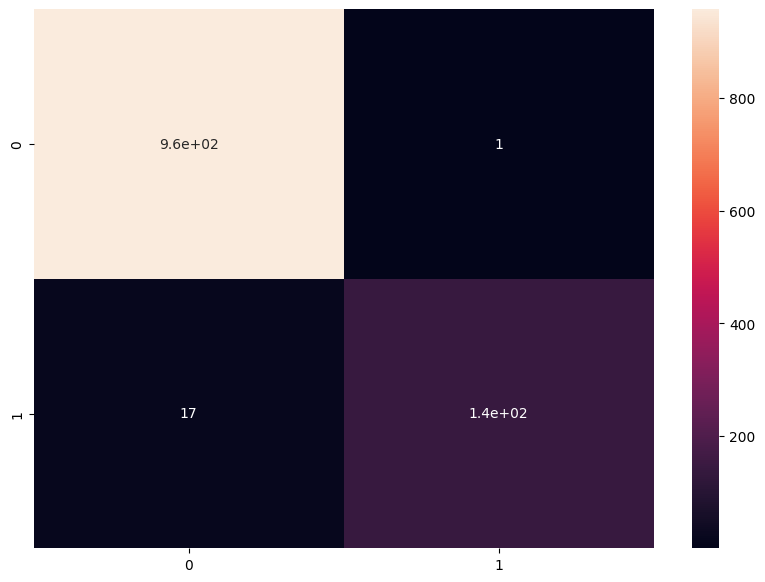

In [188]:
Evaluator(model,X_train_cv,Y_train,X_test_cv,Y_test)